👉 Definition:
Multicollinearity happens in regression when two or more independent variables are highly correlated with each other. This means they carry redundant information, making it hard for the model to determine which predictor is actually important.

🔎 Why is it a problem?

Unstable coefficients – Small changes in data can cause large swings in regression coefficients.

Inflated standard errors – It reduces the precision of estimates.

Hard interpretation – You can’t tell which variable truly affects the target.

May reduce model performance – Especially in linear models.

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

```
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
```

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load dataset

df =  pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


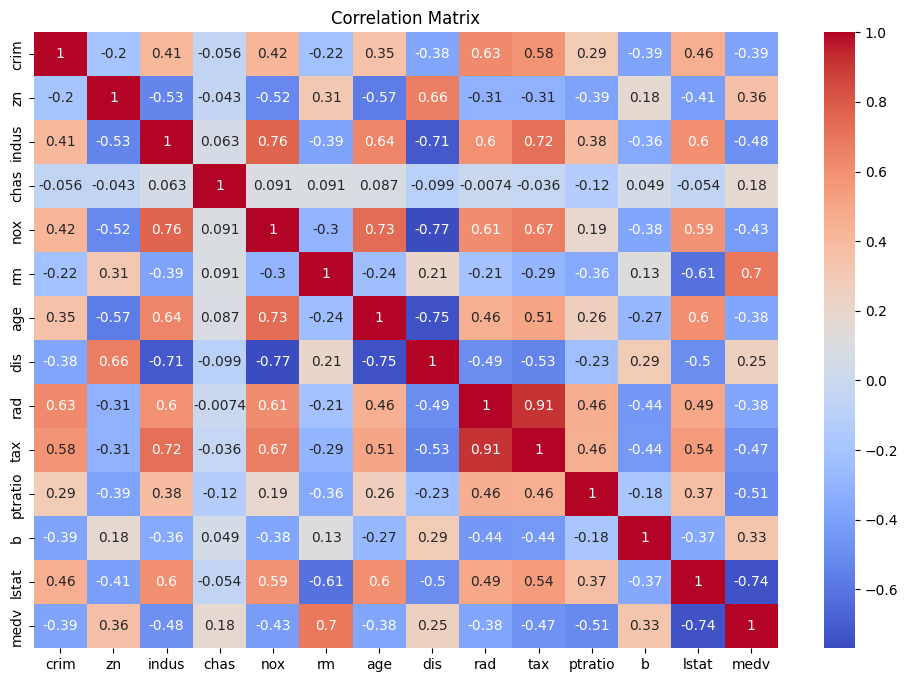

In [47]:
## Approach - 1 : Correlation
# Calculate the correlation matrix
correlation_matrix = df.corr()


# Ploting corr

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Based on the correlation matrix, identify highly correlated features. A commonly used threshold is a correlation coefficient greater than or equal 0.8 or less than or equal -0.8.

* Remove highly correlated features.

In [49]:
# Extract correlated pairs
threshold = 0.8
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if corr_value >= threshold or corr_value <= -threshold:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))

print("Highly correlated pairs (|r| >= 0.8 or <= -0.8):")
print(high_corr)

Highly correlated pairs (|r| >= 0.8 or <= -0.8):
[('tax', 'rad', np.float64(0.9102281885331865))]


In [50]:
high_corr

[('tax', 'rad', np.float64(0.9102281885331865))]

In [56]:
# Remove the features from the dataset
features_to_remove = [col for pair in high_corr for col in pair[:2]]
df_filtered_corr = df.drop(columns=features_to_remove, axis=1)

In [59]:
df_filtered_corr.head()

,crim,zn,indus,chas,nox,rm,age,dis,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2


🔹 Step 1: What is VIF?

VIF measures how much the variance of a regression coefficient is inflated due to correlation among predictors.

Rule of thumb:

VIF = 1 → No multicollinearity

VIF = 1–5 → Moderate (acceptable)

VIF > 10 → High multicollinearity (drop feature)



In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Extract the independent variables (features) and target variable
X = df.drop('medv', axis=1)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Feature,VIF
0,crim,2.100373
1,zn,2.844013
2,indus,14.485758
3,chas,1.152952
4,nox,73.894947
5,rm,77.948283
6,age,21.386850
7,dis,14.699652
8,rad,15.167725
9,tax,61.227274


* 2. **Analyze the VIF values.**

    Inspect the VIF values for each feature. Higher VIF values indicate a stronger multicollinearity. A commonly used threshold to detect multicollinearity is a VIF value greater than 5 or 10.

In [64]:
# Set the threshold for VIF
vif_threshold = 5

# Identify features with high VIF values
high_vif_features = vif[vif['VIF'] > vif_threshold]['Feature'].values

# Remove features with high VIF values from the dataset
df_filtered_vif = df.drop(high_vif_features, axis=1)

df_filtered_vif


,crim,zn,chas,medv
0,0.00632,18.0,0,24.0
1,0.02731,0.0,0,21.6
2,0.02729,0.0,0,34.7
3,0.03237,0.0,0,33.4
4,0.06905,0.0,0,36.2
...,...,...,...,...
501,0.06263,0.0,0,22.4
502,0.04527,0.0,0,20.6
503,0.06076,0.0,0,23.9
504,0.10959,0.0,0,22.0
